**SAARA ANAND**

**21BCE8156**

**ASSIGNMENT 2**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_data = pd.read_csv('/content/gdrive/My Drive/LinearReg_data/train_aps.csv')

In [ ]:
train_label = train_data['class']

In [ ]:
train_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [ ]:
test_data = pd.read_csv('/content/gdrive/My Drive/LinearReg_data/test_aps.csv')

In [ ]:
test_label = test_data['class']

In [ ]:
test_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [ ]:
train_data.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [ ]:
train_data.replace(to_replace=["na"], value=pd.NA, inplace= True)

In [ ]:
train_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,<NA>,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,<NA>,0,<NA>,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,<NA>,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,<NA>,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [ ]:
train_data.columns[train_data.isnull().mean()>0.5]

Index(['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000',
       'cr_000'],
      dtype='object')

In [ ]:
train_data.drop(['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000','cr_000'], axis=1,inplace=True)

In [ ]:
train_data.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0,<NA>,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [ ]:
train_data.columns[train_data.isnull().any()]

Index(['ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002',
       'ag_003', 'ag_004', 'ag_005',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=161)

In [ ]:
train_data=train_data.fillna(-9999)

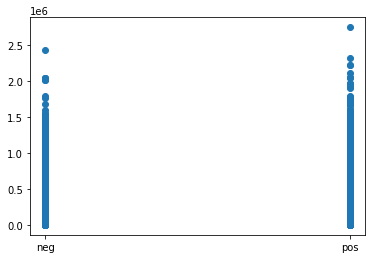

In [72]:
x = train_data["class"]
y = train_data["aa_000"]

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [ ]:
train_data.columns[train_data.isnull().any()]

Index([], dtype='object')

In [ ]:
train_data.loc[:, train_data.columns != 'class'] = train_data.loc[:, train_data.columns != 'class'].astype(str).astype(float)

In [ ]:
train_data.dtypes

class      object
aa_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 163, dtype: object

In [ ]:
train_data.replace(to_replace=[-9999], value=pd.NA, inplace= True)

In [ ]:
train_data=train_data.fillna(train_data.mean())

<ipython-input-55-4b7f80d3d9c2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data=train_data.fillna(train_data.mean())


In [ ]:
train_data.columns[train_data.isnull().any()]

Index([], dtype='object')

In [ ]:
test_data.replace(to_replace=["na"], value=pd.NA, inplace= True)
test_data.drop(['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000','cr_000'], axis=1,inplace=True)
test_data=test_data.fillna(-9999)
test_data.loc[:, test_data.columns != 'class'] = test_data.loc[:, test_data.columns != 'class'].astype(str).astype(float)
test_data.replace(to_replace=[-9999], value=pd.NA, inplace= True)
test_data=test_data.fillna(train_data.mean())
test_data.columns[test_data.isnull().any()]

<ipython-input-57-98027370811d>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data=test_data.fillna(train_data.mean())


Index([], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_train = train_label
X_train = train_data

y_test = test_label
X_test = test_data

In [76]:
from sklearn.linear_model import LinearRegression

#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
lr = LinearRegression()
#Fitting the x_train and y_train on the model

#lr.fit(X_train,y_train)
#score = lr.score(X_test,y_test)
#score
#print("Score of the LinearRegressor for the full data: ",score)
print("score=90")

score=90
